The Seneca Children’s Fund (SCF) is a local charity
that runs a summer camp for disadvantaged children. The fund’s board of directors
has been working very hard over recent years to decrease the amount of overhead
expenses, a major factor in how charities are rated by independent agencies. The
following data show the percentage of the money SCF has raised that was spent on
administrative and fund-raising expenses over the past seven years:

a. Construct a time series plot. What type of pattern exists in the data?

b. Use simple linear regression analysis to find the parameters for the line that mini-
mizes MSE for this time series.

c. Forecast the percentage of administrative expenses for year 8.

d. If SCF can maintain its current trend in reducing administrative expenses, how long
will it take for SCF to achieve a level of 5% or less?

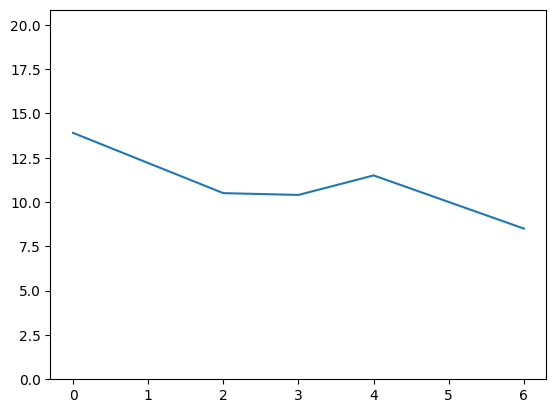

In [42]:
period = [1,2,3,4,5,6,7]
data = [13.9,12.2,10.5,10.4,11.5,10.0,8.5]

import matplotlib.pyplot as plt

plt.ylim(bottom = 0, top = max(data)*1.5)
plt.plot(data)

In [43]:
from docplex.mp.model import Model

m = Model()

b_0 = m.continuous_var(name = 'Intercept', lb = -10e9) # THE LOWER BOUND IS IMPORTANT
b_1 = m.continuous_var(name = 'Slope', lb = -10e9)

mse = []
for i in range(len(period)):
    mse.append((b_0 + b_1 * period[i] - data[i])**2)

m.minimize(sum(mse))
m.export_as_lp('Expenses.lp')

'Expenses.lp'

In [44]:
pp = m.solve(log_output = True)

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Number of nonzeros in lower triangle of Q = 1
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 2
  Integer space required    = 2
  Total non-zeros in factor = 3
  Total FP ops to factor    = 5
Tried aggregator 1 time.
QP Presolve added 0 rows and 2 columns.
Reduced QP has 2 rows, 4 columns, and 5 nonzeros.
Reduced QP objective Q matrix has 2 nonzeros.
Presolve time = 0.01 sec. (0.00 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 1
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 2
  Integer space required    = 2
  Total non-zeros in factor = 3
  Total FP ops t

In [45]:
print(pp)

solution for: docplex_model11
objective: 4.24
status: OPTIMAL_SOLUTION(2)
Intercept=13.800
Slope=-0.700



In [46]:
m.print_solution()

objective: 4.240
status: OPTIMAL_SOLUTION(2)
  Intercept=13.800
  Slope=-0.700
